In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from artificial_data import get_degree_dist
from cada import cada
from sklearn.metrics import f1_score

n_default = 100000
n_ls = 1000*np.array([1,2,5,10,20,50,100,200,500])
p_ls = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5]

#Try to tune algs if needed

In [2]:
#Read data
pr_graphs = []
for p in p_ls:
    path = f"art_data/artdat-p{p}.txt"
    pr_graphs.append(nx.read_adjlist(path,nodetype=int))

n_graphs = []
for n in n_ls:
    path = f"art_data/artdat-n{n}.txt"
    n_graphs.append(nx.read_adjlist(path,nodetype=int))


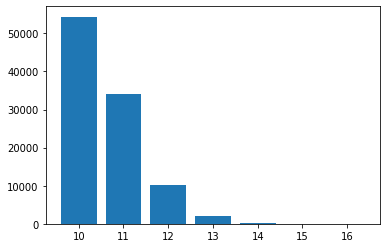

In [3]:
#Over look of degree_distributions
val,cnt = get_degree_dist(pr_graphs[2])
#print(val)
#print(cnt)
plt.bar(val,cnt)
plt.show()

Calculate f1-score (probability runs)

In [11]:
#init parameters
n_inj = int(n_default/100)
n_trials = 5
ground_truth = np.zeros(len(pr_graphs[0]))
ground_truth[n_default:] = 1

In [12]:
#Louvain
#(2m20s for one graph iter => 15min-ich)
#pr_graphs = pr_graphs[:2]
pr_f1_lv = np.zeros(shape=(len(pr_graphs),n_trials))
for ind,pr_g in enumerate(pr_graphs): 
    for trial in range(n_trials):
        #Train cada
        cada_lv = cada(pr_g)
        #Predict anomalies
        pred = cada_lv.clf(n_inj)
        pr_f1_lv[ind,trial] = f1_score(ground_truth,pred)

In [3]:
#Infomap
pr_f1_info = []
for ind,pr_g in enumerate(pr_graphs):
    cada_info = cada(pr_g, algorithm='infomap')
    pred = cada_info.clf(n_inj)
    pr_f1_info.append(f1_score(ground_truth,pred))

In [ ]:
#Fluid?
#Leiden?
#Another one?

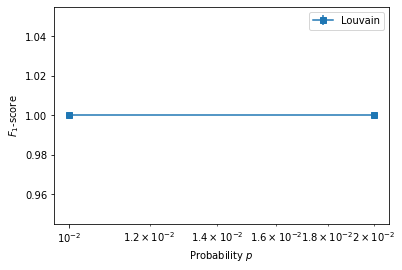

In [15]:
plt.figure()
#plt.plot(p_ls,pr_f1_lv,'-s',c='tab:blue')
#plt.plot(p_ls,pr_f1_info,'-s',c='tab:orange')
plt.errorbar(p_ls,np.mean(pr_f1_lv,axis=1),fmt='-s',c='tab:blue',yerr=np.std(pr_f1_lv,axis=1))
plt.xscale('log')
plt.xlabel(r'Probability $p$')
plt.ylabel(r'$F_1$-score')
plt.legend(['Louvain','Infomap'])
#plt.savefig('prob.png',bbox_inches='tight')
plt.show()
